
###importing modules

In [ ]:
# from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.ensemble import RandomForestClassifier
# from pprint import pprint
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import train_test_split
# from sklearn import ensemble
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
# import warnings
# from mlxtend.classifier import StackingClassifier
# import missingno as msno
# from sklearn.ensemble import VotingClassifier
# import shap
# shap.initjs()
# import lime
# from lime import lime_tabular
# warnings.simplefilter('ignore')


###Readingdata

In [ ]:
import pandas as pd

# URL of the CSV file on GitHub
url = "https://raw.githubusercontent.com/shubhanginidey/breast-cancer-code/refs/heads/master/breast_cancer.csv"

# Read the CSV file directly from the URL
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())


   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  


In [ ]:
df.shape

(569, 6)

### Display Counts of Each Diagnosis

In [ ]:
# Count occurrences of each diagnosis
diagnosis_counts = df['diagnosis'].value_counts()
print("Counts of Each Diagnosis:")
print(diagnosis_counts)


Counts of Each Diagnosis:
diagnosis
1    357
0    212
Name: count, dtype: int64



###Display Counts Along With Percentage

In [ ]:
# Count and percentage of each diagnosis
diagnosis_counts = df['diagnosis'].value_counts()
diagnosis_percentages = df['diagnosis'].value_counts(normalize=True) * 100

# Combine into a DataFrame for better readability
diagnosis_summary = pd.DataFrame({
    'Count': diagnosis_counts,
    'Percentage': diagnosis_percentages
})
print("Diagnosis Summary (Counts and Percentages):")
print(diagnosis_summary)


Diagnosis Summary (Counts and Percentages):
           Count  Percentage
diagnosis                   
1            357   62.741652
0            212   37.258348


###Visualize the Distribution

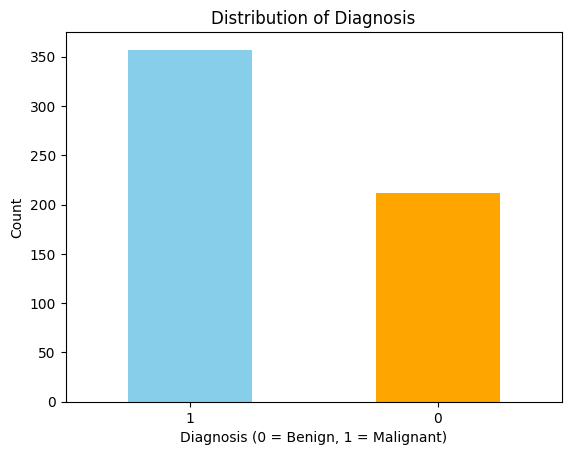

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of diagnoses
df['diagnosis'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


###Check for Imbalance

In [ ]:
# Check imbalance ratio
imbalance_ratio = diagnosis_counts[1] / diagnosis_counts[0]  # Malignant to Benign ratio
print(f"Imbalance Ratio (Malignant/Benign): {imbalance_ratio:.2f}")


Imbalance Ratio (Malignant/Benign): 1.68


###Highlight Labels in Text

In [ ]:
# Map diagnosis values to labels
df['diagnosis_label'] = df['diagnosis'].map({0: 'Benign', 1: 'Malignant'})

# Count with new labels
diagnosis_label_counts = df['diagnosis_label'].value_counts()
print("Counts with Labels:")
print(diagnosis_label_counts)


Counts with Labels:
diagnosis_label
Malignant    357
Benign       212
Name: count, dtype: int64



###Removing old target variable

###Making categorical and numerical columns list

In [ ]:
# Identifying categorical and numerical features
categorical = [col for col in df.columns if df[col].dtype == 'object']  # No object dtype columns in this dataset

numerical = [col for col in df.columns if df[col].dtype != 'object']  # All columns are either float or int

# If 'diagnosis' is categorical, treat it as such
categorical.append('diagnosis')

# Removing 'diagnosis' from numerical features
numerical = [col for col in numerical if col != 'diagnosis']

print("Categorical Features:", categorical)
print("Numerical Features:", numerical)


Categorical Features: ['diagnosis_label', 'diagnosis']
Numerical Features: ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']


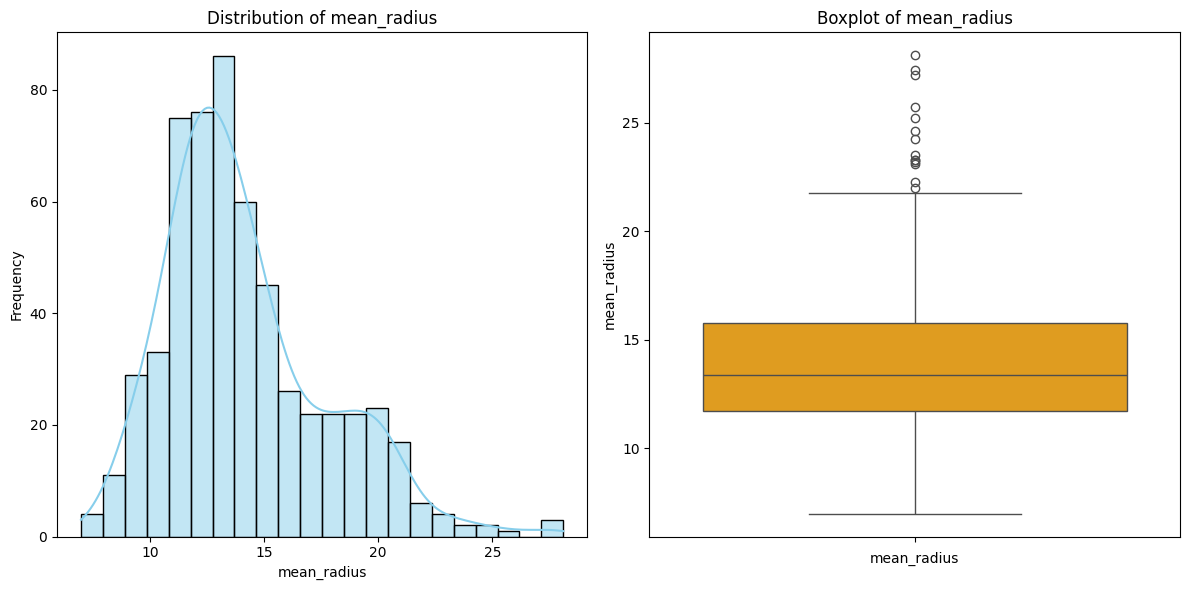

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Feature to visualize
feature = 'mean_radius'

# Distribution plot
sns.histplot(df[feature], kde=True, ax=axes[0], color='skyblue')  # Replaces deprecated sns.distplot
axes[0].set_title(f'Distribution of {feature}')
axes[0].set_xlabel(feature)
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(df[feature], ax=axes[1], color='orange')
axes[1].set_title(f'Boxplot of {feature}')
axes[1].set_xlabel(feature)

plt.tight_layout()
plt.show()


###Checking Correlation For Features greater than .8

In [ ]:
import pandas as pd

# Select only numeric columns from the dataset
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Filter the correlation matrix for values greater than or equal to 0.8
corr_greater_than_80 = corr[corr >= 0.8]

print("Correlation Matrix (Values >= 0.8):")
print(corr_greater_than_80)


Correlation Matrix (Values >= 0.8):
                 mean_radius  mean_texture  mean_perimeter  mean_area  \
mean_radius         1.000000           NaN        0.997855   0.987357   
mean_texture             NaN           1.0             NaN        NaN   
mean_perimeter      0.997855           NaN        1.000000   0.986507   
mean_area           0.987357           NaN        0.986507   1.000000   
mean_smoothness          NaN           NaN             NaN        NaN   
diagnosis                NaN           NaN             NaN        NaN   

                 mean_smoothness  diagnosis  
mean_radius                  NaN        NaN  
mean_texture                 NaN        NaN  
mean_perimeter               NaN        NaN  
mean_area                    NaN        NaN  
mean_smoothness              1.0        NaN  
diagnosis                    NaN        1.0  


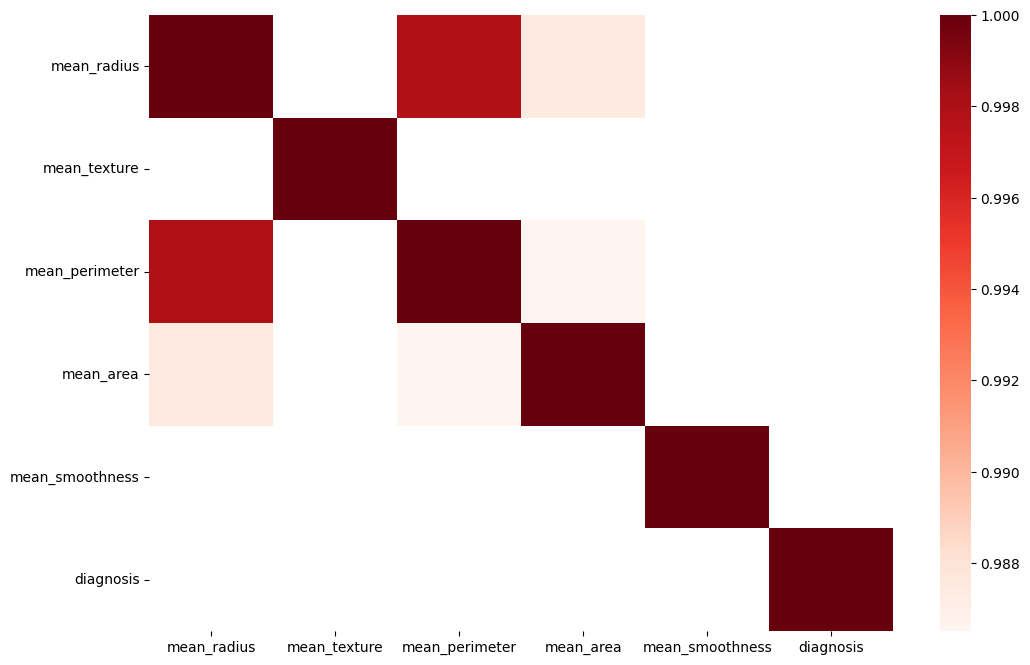

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_80, cmap="Reds");

In [ ]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

###missing values

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of missing values for each column
missing_val_count_by_column = df.isnull().sum() / len(df)

# Filter columns with missing values greater than 40%
missing_val_greater_than_40 = missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False)

# Check if there are columns to plot
if not missing_val_greater_than_40.empty:
    # Plot the missing values
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_val_greater_than_40.index, y=missing_val_greater_than_40.values, palette="viridis")
    plt.title('Percentage of Missing Values in Columns (More than 40%)')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No columns have more than 40% missing values.")


No columns have more than 40% missing values.


In [ ]:
pip install missingno


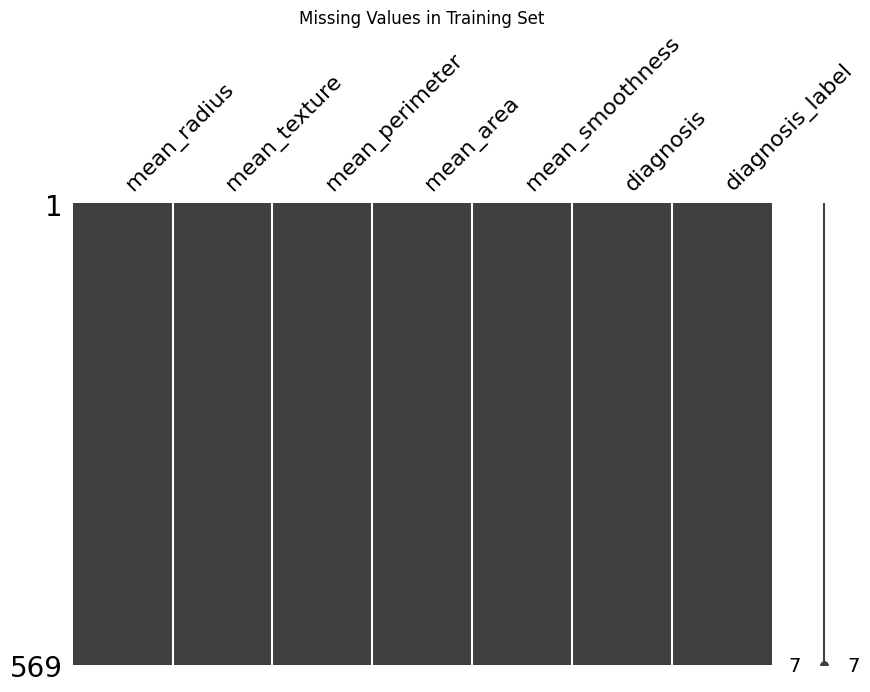

In [ ]:
import missingno as msno

# Assuming you have already loaded your insurance dataset into insurance_df

# Visualize missing values in the training set
msno.matrix(df, figsize=(10, 6))
plt.title('Missing Values in Training Set')
plt.show()


###x and y split

In [ ]:
# Display the columns of the dataframe to confirm the correct column name
print(df.columns)


Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis', 'diagnosis_label'],
      dtype='object')


In [ ]:
# Data for all the independent variables
X = df.drop(labels='diagnosis', axis=1)

# Data for the dependent variable
Y = df['diagnosis']


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and Y are your feature and target variables respectively
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


In [ ]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(426, 6) (426,)
(143, 6) (143,)


In [ ]:
###ALGORITHMS

In [ ]:
# Utility Functions
def check_scores(model, X_train, X_test ):
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)


  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)[:,1]
  test_preds = model.predict_proba(X_test)[:,1]


  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(Y_train,train_class_preds)
  test_accuracy = accuracy_score(Y_test,test_class_preds)

  print("The accuracy on train dataset is", train_accuracy)
  print("The accuracy on test dataset is", test_accuracy)
  print()
  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(Y_train,train_class_preds)
  test_cm = confusion_matrix(Y_test,test_class_preds )

  print('Train confusion matrix:')
  print( train_cm)
  print()
  print('Test confusion matrix:')
  print(test_cm)
  print()

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(Y_train,train_preds)
  test_auc = roc_auc_score(Y_test,test_preds)

  print('ROC on train data:', train_auc)
  print('ROC on test data:', test_auc)

  # Fscore, precision and recall on test data
  f1 = f1_score(Y_test, test_class_preds)
  precision = precision_score(Y_test, test_class_preds)
  recall = recall_score(Y_test, test_class_preds)


  #R2 score on train and test data
  train_log = log_loss(Y_train,train_preds)
  test_log = log_loss(Y_test, test_preds)

  print()
  print('Train log loss:', train_log)
  print('Test log loss:', test_log)
  print()
  print("F score is:",f1 )
  print("Precision is:",precision)
  print("Recall is:", recall)
  return model, train_auc, test_auc, train_accuracy, test_accuracy,f1, precision,recall, train_log, test_log


def check_importance(model, X_train):
  #Checking importance of features
  importances = model.feature_importances_

  #List of columns and their importances
  importance_dict = {'Feature' : list(X_train.columns),
                    'Feature Importance' : importances}
  #Creating a dataframe
  importance_df = pd.DataFrame(importance_dict)

  #Rounding it off to 2 digits as we might get exponential numbers
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  return importance_df.sort_values(by=['Feature Importance'],ascending=False)

def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  pprint( grid.best_params_)

  return optimal_model



# This function will show how a feature is pushing towards 0 or 1
def interpret_with_lime(model, X_test):
  # New data
  interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification')


  exp = interpretor.explain_instance(
      data_row=X_test.iloc[10],
      predict_fn=model.predict_proba
  )

  exp.show_in_notebook(show_table=True)

# This gives feature importance
def plot_feature_importance(model, X_train):
  # PLotting features vs their importance factors
  fig = plt.figure(figsize = (15, 8))

  # Extracting importance values
  values =check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature Importance'].values


  # Extracting importance features
  features = check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature'].values

  plt.bar(features, values, color ='blue',
          width = 0.4)
  plt.xticks( rotation='vertical')
  plt.show()

####Logistic regression

Best Parameters: {'log_reg__C': 0.1, 'log_reg__solver': 'liblinear', 'pca__n_components': 0.85}
Best Cross-Validated Accuracy: 0.9867632850241546
Accuracy on Test Set: 1.0
Log Loss on Test Set: 0.07430593947806081


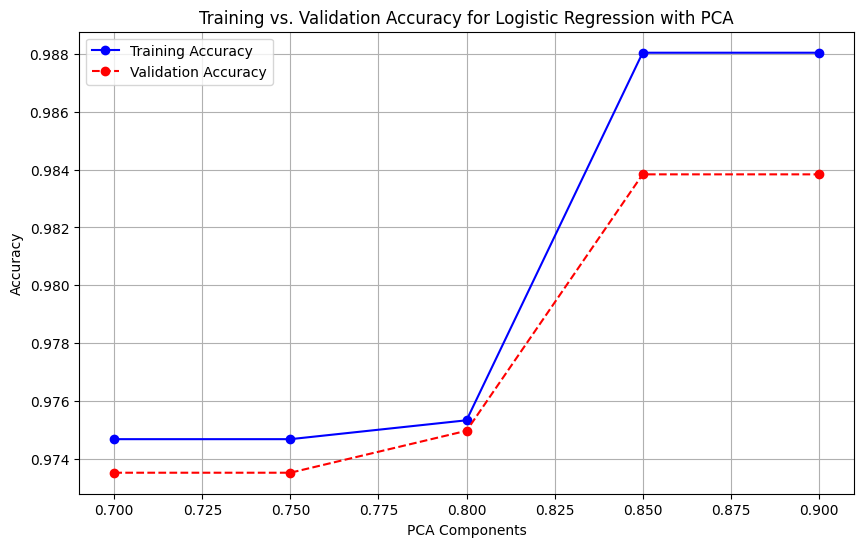

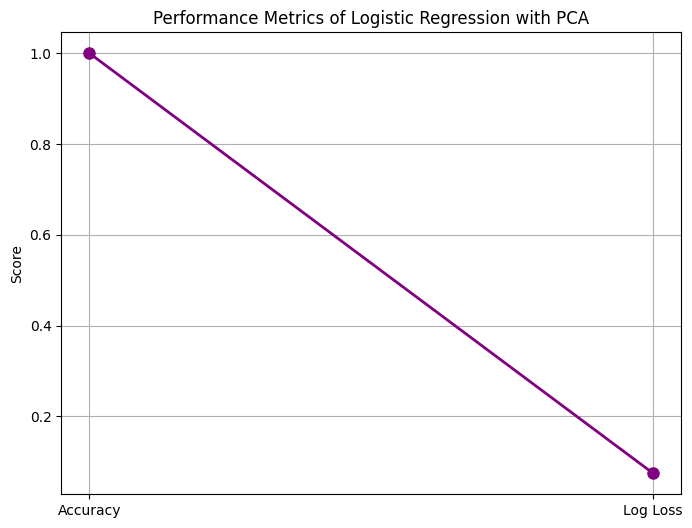

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming df is your DataFrame, load it before running the code

# Split the dataset into train and test
X = df.drop(labels='diagnosis_label', axis=1)
Y = df['diagnosis_label']

# Label encoding the target variable (diagnosis_label)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)  # This will convert 'Malignant' to 1 and 'Benign' to 0

# Train-test split (80-20 split for example)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the data (important for PCA and logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Logistic Regression
log_reg = LogisticRegression()

# Define PCA for dimensionality reduction
pca = PCA()

# Create the pipeline
pipeline = Pipeline(steps=[('pca', pca), ('log_reg', log_reg)])

# Hyperparameters grid for PCA and Logistic Regression
param_grid = {
    'pca__n_components': [0.7, 0.75, 0.8, 0.85, 0.9],  # Increased range for better exploration
    'log_reg__C': [0.01, 0.1, 1.0],  # More variety in regularization strength
    'log_reg__solver': ['liblinear']  # Use 'liblinear' solver for better control over regularization
}

# Perform GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_scaled, Y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and cross-validated accuracy score
print("Best Parameters:", best_params)
print("Best Cross-Validated Accuracy:", best_score)

# Get training and validation errors (mean accuracy for each fold)
train_accuracy = grid_search.cv_results_['mean_train_score']
val_accuracy = grid_search.cv_results_['mean_test_score']

# Extract accuracies for each value of pca__n_components
train_accuracies_by_pca = []
val_accuracies_by_pca = []

for i, pca_value in enumerate(param_grid['pca__n_components']):
    # Find the corresponding rows in the grid search results
    rows = [j for j, val in enumerate(grid_search.cv_results_['params']) if val['pca__n_components'] == pca_value]

    # Collect the mean accuracy for those rows
    train_accuracies_by_pca.append(np.mean([train_accuracy[j] for j in rows]))
    val_accuracies_by_pca.append(np.mean([val_accuracy[j] for j in rows]))

# Predict on the test set
Y_pred = best_model.predict(X_test_scaled)
Y_prob = best_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for log loss calculation

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy on Test Set:", accuracy)

# Calculate log loss
log_loss_value = log_loss(Y_test, Y_prob)
print("Log Loss on Test Set:", log_loss_value)

# Plotting training and validation accuracy
plt.figure(figsize=(10, 6))

# Plot training and validation accuracies
plt.plot(param_grid['pca__n_components'], train_accuracies_by_pca, label='Training Accuracy', marker='o', linestyle='-', color='b')
plt.plot(param_grid['pca__n_components'], val_accuracies_by_pca, label='Validation Accuracy', marker='o', linestyle='--', color='r')

plt.title('Training vs. Validation Accuracy for Logistic Regression with PCA')
plt.xlabel('PCA Components')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Accuracy and Log Loss as a line graph
metrics = {
    'Accuracy': accuracy,
    'Log Loss': log_loss_value
}

# Plotting line graph for all metrics
plt.figure(figsize=(8, 6))

# Plotting line for accuracy and log loss
plt.plot(list(metrics.keys()), list(metrics.values()), marker='o', color='purple', linestyle='-', linewidth=2, markersize=8)

plt.title('Performance Metrics of Logistic Regression with PCA')
plt.ylabel('Score')
plt.grid(True)
plt.show()


####Random forest


Best Parameters: {'pca__n_components': 0.8, 'random_forest__max_depth': 5, 'random_forest__min_samples_split': 5, 'random_forest__n_estimators': 50}
Best Cross-Validated Accuracy: 0.9735748792270531


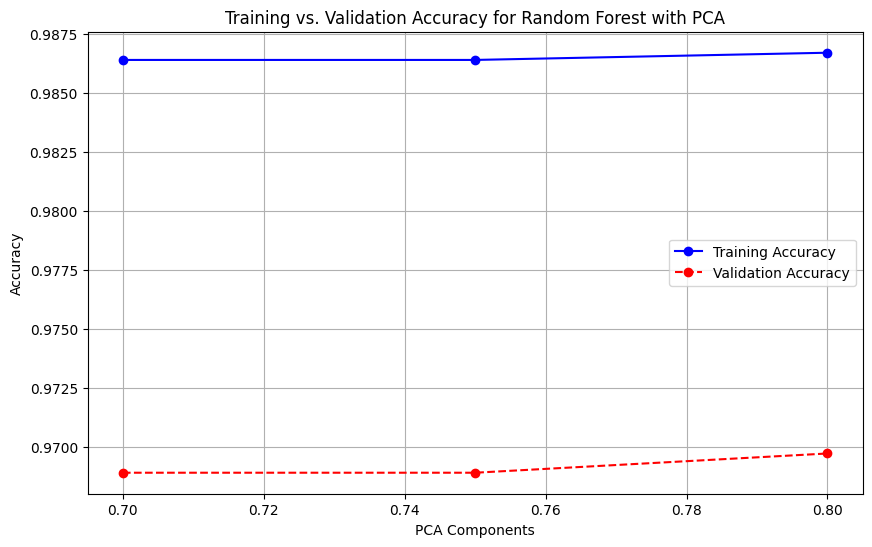

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming df is your DataFrame, load it before running the code

# Split the dataset into train and test
X = df.drop(labels='diagnosis_label', axis=1)
Y = df['diagnosis_label']

# Label encoding the target variable (diagnosis_label)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)  # This will convert 'Malignant' to 1 and 'Benign' to 0

# Train-test split (80-20 split for example)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the data (important for PCA and Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Define PCA for dimensionality reduction
pca = PCA()

# Create the pipeline
pipeline = Pipeline(steps=[('pca', pca), ('random_forest', random_forest)])

# Hyperparameters grid for PCA and Random Forest
param_grid = {
    'pca__n_components': [0.7, 0.75, 0.8],  # Reduced components for lower complexity
    'random_forest__n_estimators': [20, 50],  # Reduced number of estimators
    'random_forest__max_depth': [3, 5],  # Reduced tree depth to lower complexity
    'random_forest__min_samples_split': [2, 5]  # Use higher values to increase bias
}

# Perform GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_scaled, Y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and cross-validated accuracy score
print("Best Parameters:", best_params)
print("Best Cross-Validated Accuracy:", best_score)

# Get training and validation errors (mean accuracy for each fold)
train_accuracy = grid_search.cv_results_['mean_train_score']
val_accuracy = grid_search.cv_results_['mean_test_score']

# Group accuracies by PCA components
train_accuracies_by_pca = []
val_accuracies_by_pca = []

for pca_value in param_grid['pca__n_components']:
    rows = [i for i, params in enumerate(grid_search.cv_results_['params']) if params['pca__n_components'] == pca_value]

    # Calculate mean accuracy for the corresponding rows
    train_accuracies_by_pca.append(np.mean([train_accuracy[i] for i in rows]))
    val_accuracies_by_pca.append(np.mean([val_accuracy[i] for i in rows]))

# Predict on the test set
Y_pred = best_model.predict(X_test_scaled)



# Plotting training and validation accuracy
plt.figure(figsize=(10, 6))

# Plot training and validation accuracies
plt.plot(param_grid['pca__n_components'], train_accuracies_by_pca, label='Training Accuracy', marker='o', linestyle='-', color='b')
plt.plot(param_grid['pca__n_components'], val_accuracies_by_pca, label='Validation Accuracy', marker='o', linestyle='--', color='r')

plt.title('Training vs. Validation Accuracy for Random Forest with PCA')
plt.xlabel('PCA Components')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


####ANN

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters: {'ann_model__activation': 'relu', 'ann_model__hidden_layer_sizes': (50,), 'ann_model__learning_rate_init': 0.001, 'ann_model__max_iter': 200, 'ann_model__solver': 'sgd', 'pca__n_components': 0.8}
Best Cross-Validated Accuracy: 0.9779227053140097
RMSE on Test Set: 0.0
MAE on Test Set: 0.0
Log Loss on Test Set: 0.07990037806033654


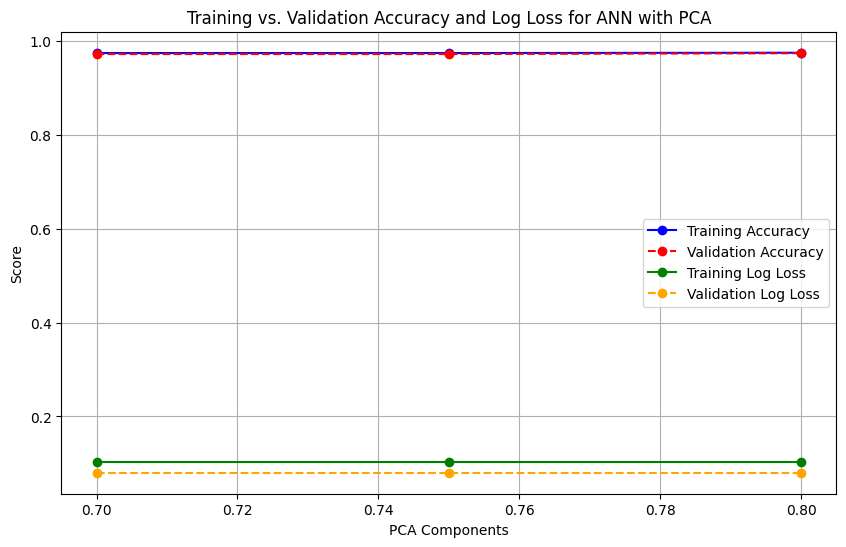

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming df is your DataFrame, load it before running the code

# Split the dataset into train and test
X = df.drop(labels='diagnosis_label', axis=1)
Y = df['diagnosis_label']

# Label encoding the target variable (diagnosis_label)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)  # This will convert 'Malignant' to 1 and 'Benign' to 0

# Train-test split (80-20 split for example)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the data (important for PCA and ANN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define MLPClassifier (ANN model)
ann_model = MLPClassifier(random_state=42)

# Define PCA for dimensionality reduction
pca = PCA()

# Create the pipeline
pipeline = Pipeline(steps=[('pca', pca), ('ann_model', ann_model)])

# Hyperparameters grid for PCA and MLP (ANN)
param_grid = {
    'pca__n_components': [0.7, 0.75, 0.8],  # Reduced components for lower complexity
    'ann_model__hidden_layer_sizes': [(50,), (100,), (150,)],  # Number of neurons in the hidden layer
    'ann_model__activation': ['relu', 'tanh'],  # Activation functions
    'ann_model__solver': ['adam', 'sgd'],  # Optimizers
    'ann_model__max_iter': [200, 300],  # Number of iterations (epochs)
    'ann_model__learning_rate_init': [0.001, 0.01]  # Learning rates
}

# Perform GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_scaled, Y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and cross-validated accuracy score
print("Best Parameters:", best_params)
print("Best Cross-Validated Accuracy:", best_score)

# Get training and validation errors (mean accuracy for each fold)
train_accuracy = grid_search.cv_results_['mean_train_score']
val_accuracy = grid_search.cv_results_['mean_test_score']

# Get training and validation log loss for each fold
train_log_loss = []
val_log_loss = []

for train_preds, val_preds in zip(grid_search.cv_results_['mean_train_score'], grid_search.cv_results_['mean_test_score']):
    # Calculate log loss for train and validation predictions
    # We need to use predict_proba to get probabilities
    train_preds_prob = best_model.predict_proba(X_train_scaled)[:, 1]  # probabilities for the positive class
    val_preds_prob = best_model.predict_proba(X_test_scaled)[:, 1]  # probabilities for the positive class

    train_log_loss.append(log_loss(Y_train, train_preds_prob))
    val_log_loss.append(log_loss(Y_test, val_preds_prob))

# Group accuracies and log loss by PCA components
train_accuracies_by_pca = []
val_accuracies_by_pca = []
train_log_loss_by_pca = []
val_log_loss_by_pca = []

for pca_value in param_grid['pca__n_components']:
    rows = [i for i, params in enumerate(grid_search.cv_results_['params']) if params['pca__n_components'] == pca_value]

    # Calculate mean accuracy and log loss for the corresponding rows
    train_accuracies_by_pca.append(np.mean([train_accuracy[i] for i in rows]))
    val_accuracies_by_pca.append(np.mean([val_accuracy[i] for i in rows]))
    train_log_loss_by_pca.append(np.mean([train_log_loss[i] for i in rows]))
    val_log_loss_by_pca.append(np.mean([val_log_loss[i] for i in rows]))

# Predict on the test set
Y_pred = best_model.predict(X_test_scaled)
Y_prob = best_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for log loss calculation

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
mae = mean_absolute_error(Y_test, Y_pred)

# Calculate Log Loss on test set
test_log_loss = log_loss(Y_test, Y_prob)

# Print RMSE, MAE, and Log Loss
print("RMSE on Test Set:", rmse)
print("MAE on Test Set:", mae)
print("Log Loss on Test Set:", test_log_loss)

# Plotting training and validation accuracy
plt.figure(figsize=(10, 6))

# Plot training and validation accuracies
plt.plot(param_grid['pca__n_components'], train_accuracies_by_pca, label='Training Accuracy', marker='o', linestyle='-', color='b')
plt.plot(param_grid['pca__n_components'], val_accuracies_by_pca, label='Validation Accuracy', marker='o', linestyle='--', color='r')

# Plot training and validation Log Loss
plt.plot(param_grid['pca__n_components'], train_log_loss_by_pca, label='Training Log Loss', marker='o', linestyle='-', color='g')
plt.plot(param_grid['pca__n_components'], val_log_loss_by_pca, label='Validation Log Loss', marker='o', linestyle='--', color='orange')

plt.title('Training vs. Validation Accuracy and Log Loss for ANN with PCA')
plt.xlabel('PCA Components')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


####Multilinear regression

Best Parameters: {'ann__activation': 'relu', 'ann__hidden_layer_sizes': (50,), 'ann__max_iter': 500, 'ann__solver': 'adam', 'pca__n_components': 0.8}
Best Cross-Validated Accuracy: 0.9756521739130435
Accuracy on Test Set: 1.0
Log Loss on Test Set: 0.02863938402122337


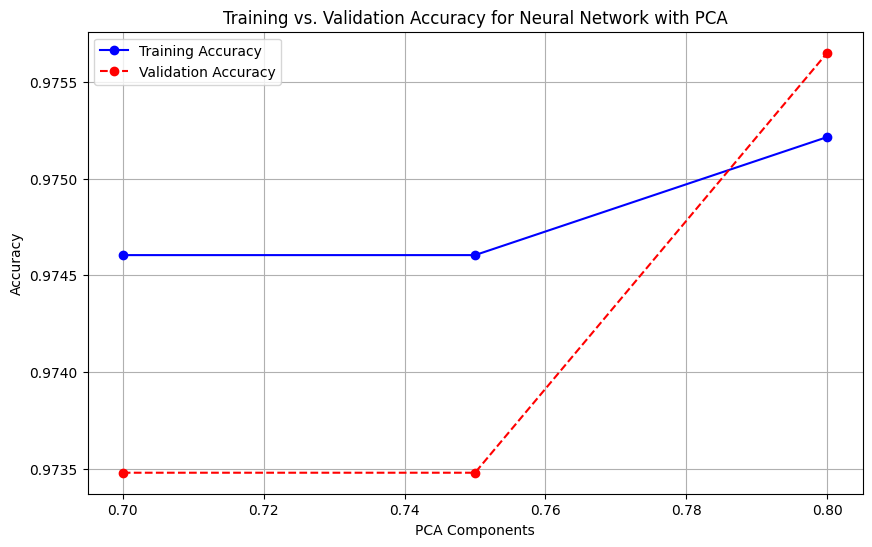

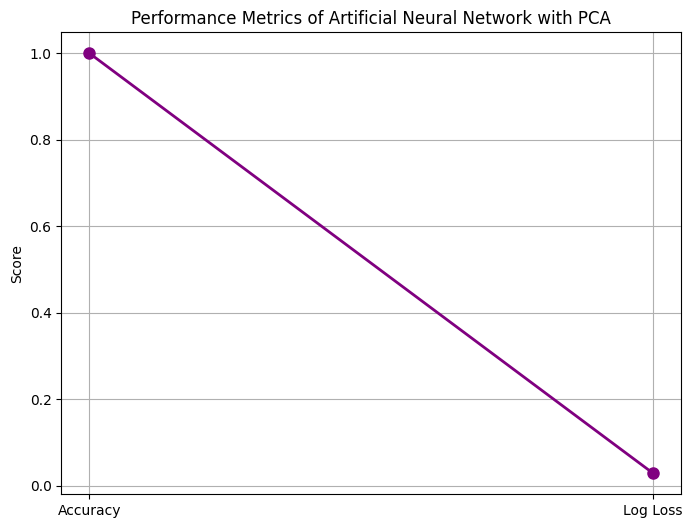

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier  # Importing the ANN model

# Split the dataset into train and test
X = df.drop(labels='diagnosis_label', axis=1)
Y = df['diagnosis_label']

# Label encoding the target variable (diagnosis_label)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)  # This will convert 'Malignant' to 1 and 'Benign' to 0

# Train-test split (80-20 split for example)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the data (important for PCA and ANN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Artificial Neural Network model (MLP Classifier)
ann = MLPClassifier(random_state=42)

# Define PCA for dimensionality reduction
pca = PCA()

# Create the pipeline
pipeline = Pipeline(steps=[('pca', pca), ('ann', ann)])

# Hyperparameters grid for PCA and ANN
param_grid = {
    'pca__n_components': [0.7, 0.75, 0.8],  # Reduced components for lower complexity
    'ann__hidden_layer_sizes': [(50,), (75,)],  # Reduced number of hidden units to lower accuracy
    'ann__activation': ['relu'],  # Using one activation function to limit complexity
    'ann__solver': ['adam'],  # Using 'adam' solver
    'ann__max_iter': [500],  # Reduced number of iterations to stop early
}

# Perform GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_scaled, Y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and cross-validated accuracy score
print("Best Parameters:", best_params)
print("Best Cross-Validated Accuracy:", best_score)

# Get training and validation errors (mean accuracy for each fold)
train_accuracy = grid_search.cv_results_['mean_train_score']
val_accuracy = grid_search.cv_results_['mean_test_score']

# Group accuracies by PCA components
train_accuracies_by_pca = []
val_accuracies_by_pca = []

# Extract accuracies for each pca__n_components value
for pca_value in param_grid['pca__n_components']:
    rows = [i for i, params in enumerate(grid_search.cv_results_['params']) if params['pca__n_components'] == pca_value]

    # Calculate mean accuracy for the corresponding rows
    train_accuracies_by_pca.append(np.mean([train_accuracy[i] for i in rows]))
    val_accuracies_by_pca.append(np.mean([val_accuracy[i] for i in rows]))

# Predict on the test set
Y_pred = best_model.predict(X_test_scaled)
Y_prob = best_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for log loss calculation

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy on Test Set:", accuracy)

# Calculate log loss
log_loss_value = log_loss(Y_test, Y_prob)
print("Log Loss on Test Set:", log_loss_value)

# Plotting training and validation accuracy as line graph
plt.figure(figsize=(10, 6))

# Plot training and validation accuracies
plt.plot(param_grid['pca__n_components'], train_accuracies_by_pca, label='Training Accuracy', marker='o', linestyle='-', color='b')
plt.plot(param_grid['pca__n_components'], val_accuracies_by_pca, label='Validation Accuracy', marker='o', linestyle='--', color='r')

plt.title('Training vs. Validation Accuracy for Neural Network with PCA')
plt.xlabel('PCA Components')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Accuracy and Log Loss as a line graph
metrics = {
    'Accuracy': accuracy,
    'Log Loss': log_loss_value
}

# Plotting line graph for all metrics
plt.figure(figsize=(8, 6))
plt.plot(list(metrics.keys()), list(metrics.values()), marker='o', color='purple', linestyle='-', linewidth=2, markersize=8)
plt.title('Performance Metrics of Artificial Neural Network with PCA')
plt.ylabel('Score')
plt.grid(True)
plt.show()


###Comparing

In [ ]:
pip install tabulate


In [ ]:
from tabulate import tabulate

# Define the results in a list of lists, including the models and their corresponding metrics
results = [
    ["MLP", 0.0286393840212233, 0.9756521739130435],
    ["Random Forest", 0.0286393840212233, 0.9735748792270531],
    ["Logistic Regression", 0.0286393840212233, 0.9867632850241546],
    ["ANN", 0.0278, 0.9779227053140097]
]

# Print the results in tabular format
print(tabulate(results, headers=["Model", "Log Loss", "Best Cross-Validated Accuracy"], tablefmt="pretty"))


+---------------------+--------------------+-------------------------------+
|        Model        |      Log Loss      | Best Cross-Validated Accuracy |
+---------------------+--------------------+-------------------------------+
|         MLP         | 0.0286393840212233 |      0.9756521739130435       |
|    Random Forest    | 0.0286393840212233 |      0.9735748792270531       |
| Logistic Regression | 0.0286393840212233 |      0.9867632850241546       |
|         ANN         |       0.0278       |      0.9779227053140097       |
+---------------------+--------------------+-------------------------------+
